In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Cuisine_rating.csv')

## The Cuisine Rating dataset is from a survey that was carried out in a restaurant in New York about 2 years ago.

## The data includes demographics like Customers' Marital Status, Activity (profession), Gender, Budget (presumably in USD), 7 kinds of cuisines, Food and Service Ratings, and Alcohol consumption/Smoker information.

## The following analysis is a quick overview of customer preferences by some of these categories.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [7]:
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
df.shape

(200, 15)

In [48]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [49]:
df.tail(3)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No
199,200,140,"Upper East Side,NY",Male,2005,Married,Student,4,French,Never,Never,3,2,2.5,No


In [50]:
df.drop(columns = ['Area code', 'Often A S', 'User ID', 'Location'], inplace = True)

In [51]:
df.head()

,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating
0,Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5
1,Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0
2,Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0
3,Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0
4,Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0


In [27]:
df.isnull().sum()

User ID           0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
dtype: int64

In [15]:
df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_2520\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User ID,YOB,Budget,Food Rating,Service Rating,Overall Rating
User ID,1.000000,0.006203,-0.010148,-0.003691,0.111227,0.076208
YOB,0.006203,1.000000,-0.071383,0.040774,0.043651,0.057508
Budget,-0.010148,-0.071383,1.000000,0.057764,-0.135542,-0.058049
Food Rating,-0.003691,0.040774,0.057764,1.000000,0.079056,0.709562
Service Rating,0.111227,0.043651,-0.135542,0.079056,1.000000,0.758532
Overall Rating,0.076208,0.057508,-0.058049,0.709562,0.758532,1.000000


# We see some correlation between Service Rating and Overall Rating (0.76), and Food Rating and Overall Rating (0.71)

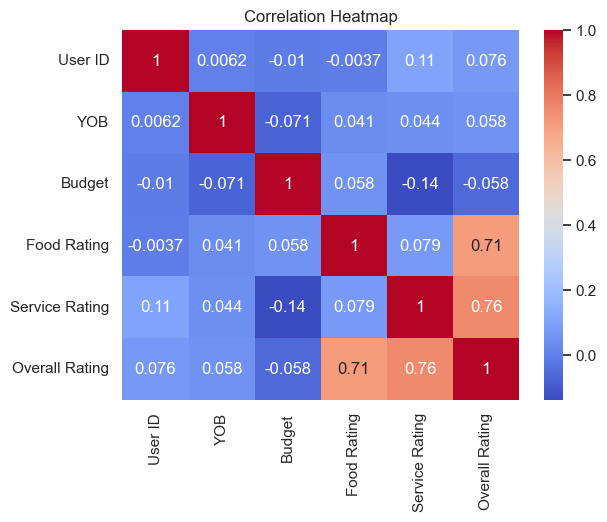

In [34]:
sns.set(style = 'darkgrid')

sns.heatmap(
            df.drop(columns = [i for i in df.columns if df[i].dtype == 'object']).corr(), 
            annot = True,      # annotate (display) values on the heatmap
            cmap = 'coolwarm',
            )

plt.title('Correlation Heatmap');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


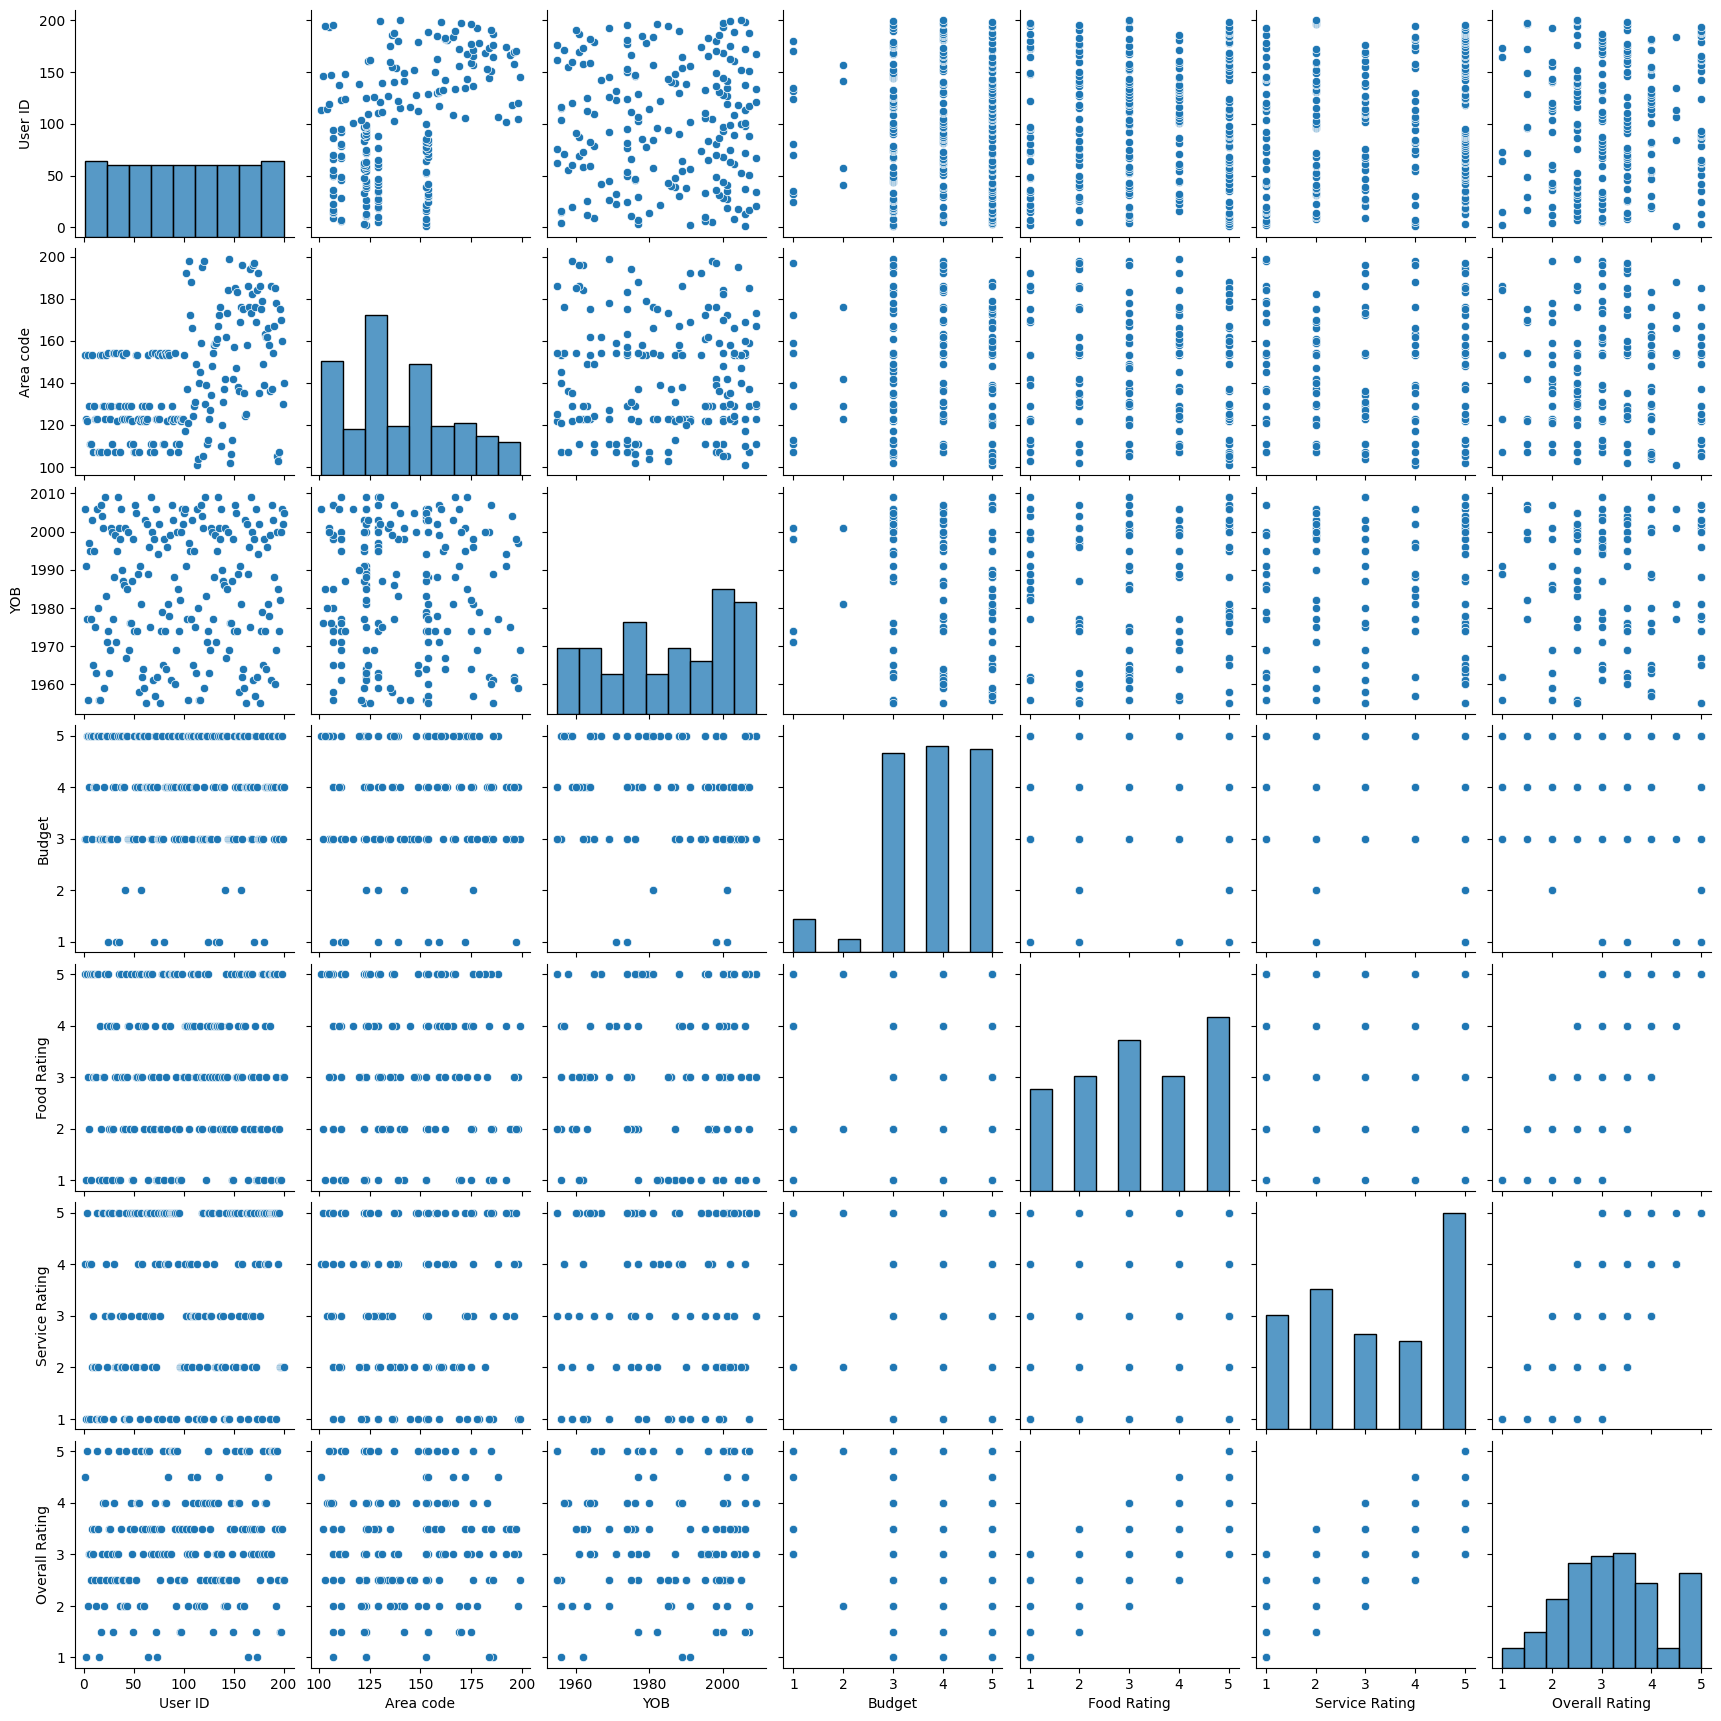

In [13]:
sns.pairplot(df)

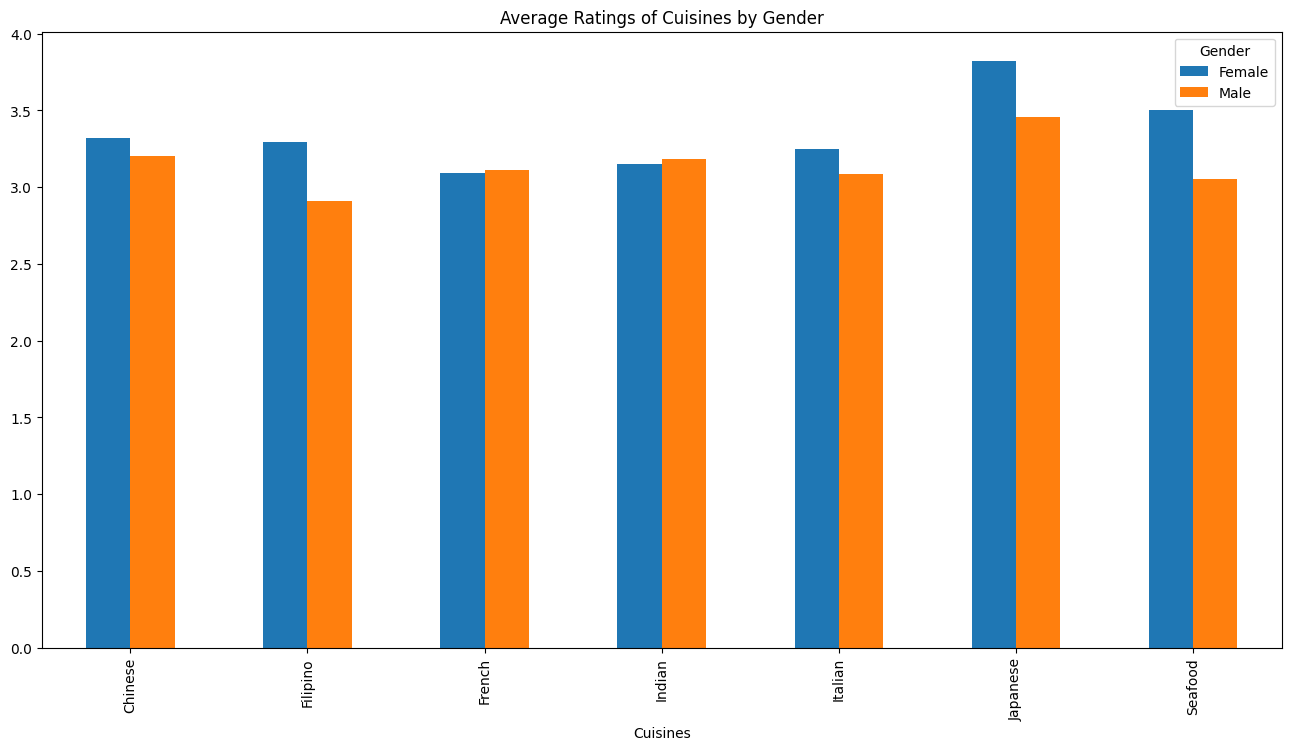

In [14]:
table1 = df.pivot_table(index = 'Cuisines', columns = 'Gender', values = 'Overall Rating', aggfunc = 'mean')

table1.plot(kind = 'bar', figsize = (16,8), title = 'Average Ratings of Cuisines by Gender');

## Women were generally less critical of foods, Except for French and Indian cuisine.

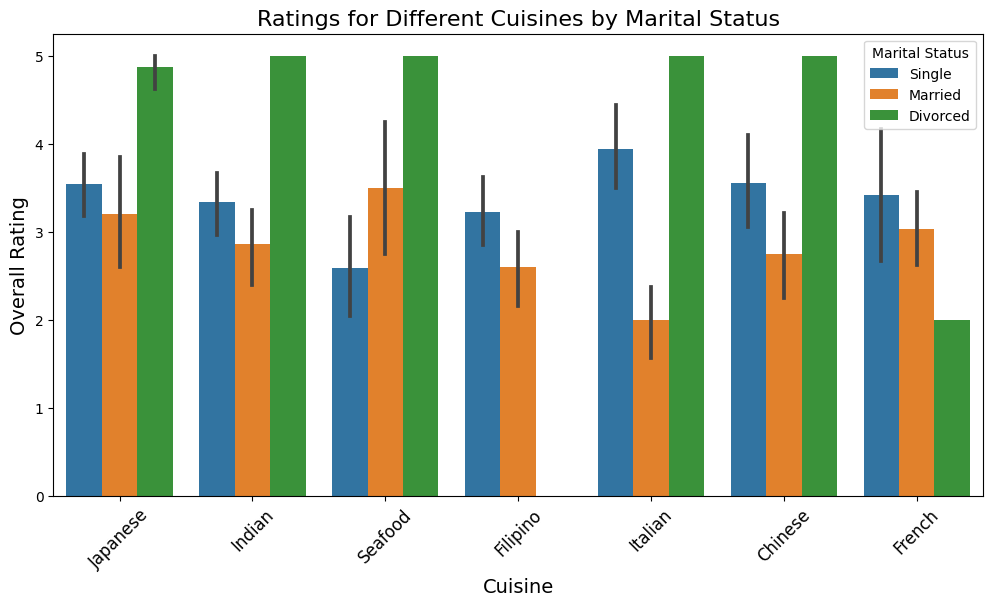

In [16]:
plt.figure(figsize=(12, 6))

sns.barplot(x='Cuisines', y='Overall Rating', hue='Marital Status', data=df, )

plt.title('Ratings for Different Cuisines by Marital Status', fontsize=16)
plt.xlabel('Cuisine', fontsize=14)
plt.ylabel('Overall Rating', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.legend(title='Marital Status')

# Show the plot

plt.show()

## Divorced people seemed to generally enjoy the food more than others (with the Exception of French food again). Single people next (except when it came to seafood). It appears that married people are more difficult to please, when it comes to eating out.

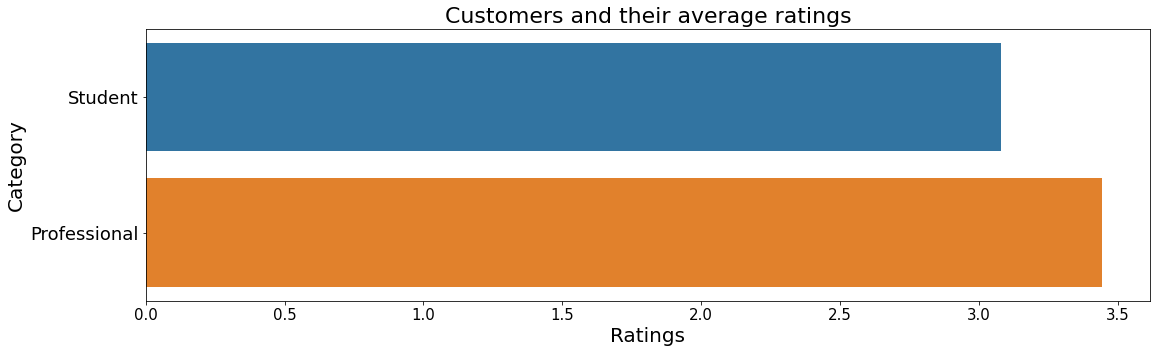

In [3]:
table2 = df.groupby('Activity')['Overall Rating'].mean().sort_values()

plt.figure(figsize = (18, 5))

fig = sns.barplot(x = table2, y = table2.index,)

plt.xlabel('Ratings', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Category', fontsize = 20)
plt.yticks(fontsize = 18)
plt.title('Customers and their average ratings', fontsize = 22);

## Students generally seem to rate foods lower than professionals.

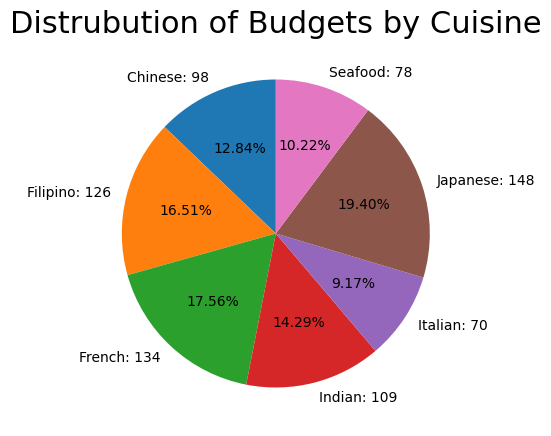

In [22]:
cuisine_budgets = df.groupby('Cuisines')['Budget'].sum()

size = cuisine_budgets.values
label = [f'{cuisine}: {size[i]}' for i, cuisine in enumerate(cuisine_budgets.index)]

plt.figure(figsize = (5, 5))
plt.pie(size, labels = label, autopct = '%.2f%%', startangle = 90)
plt.title('Distrubution of Budgets by Cuisine', fontsize = 22);

## People spend the most on Japanese food, followed by French and Filipino meals, and least on Italian food and Seafood.

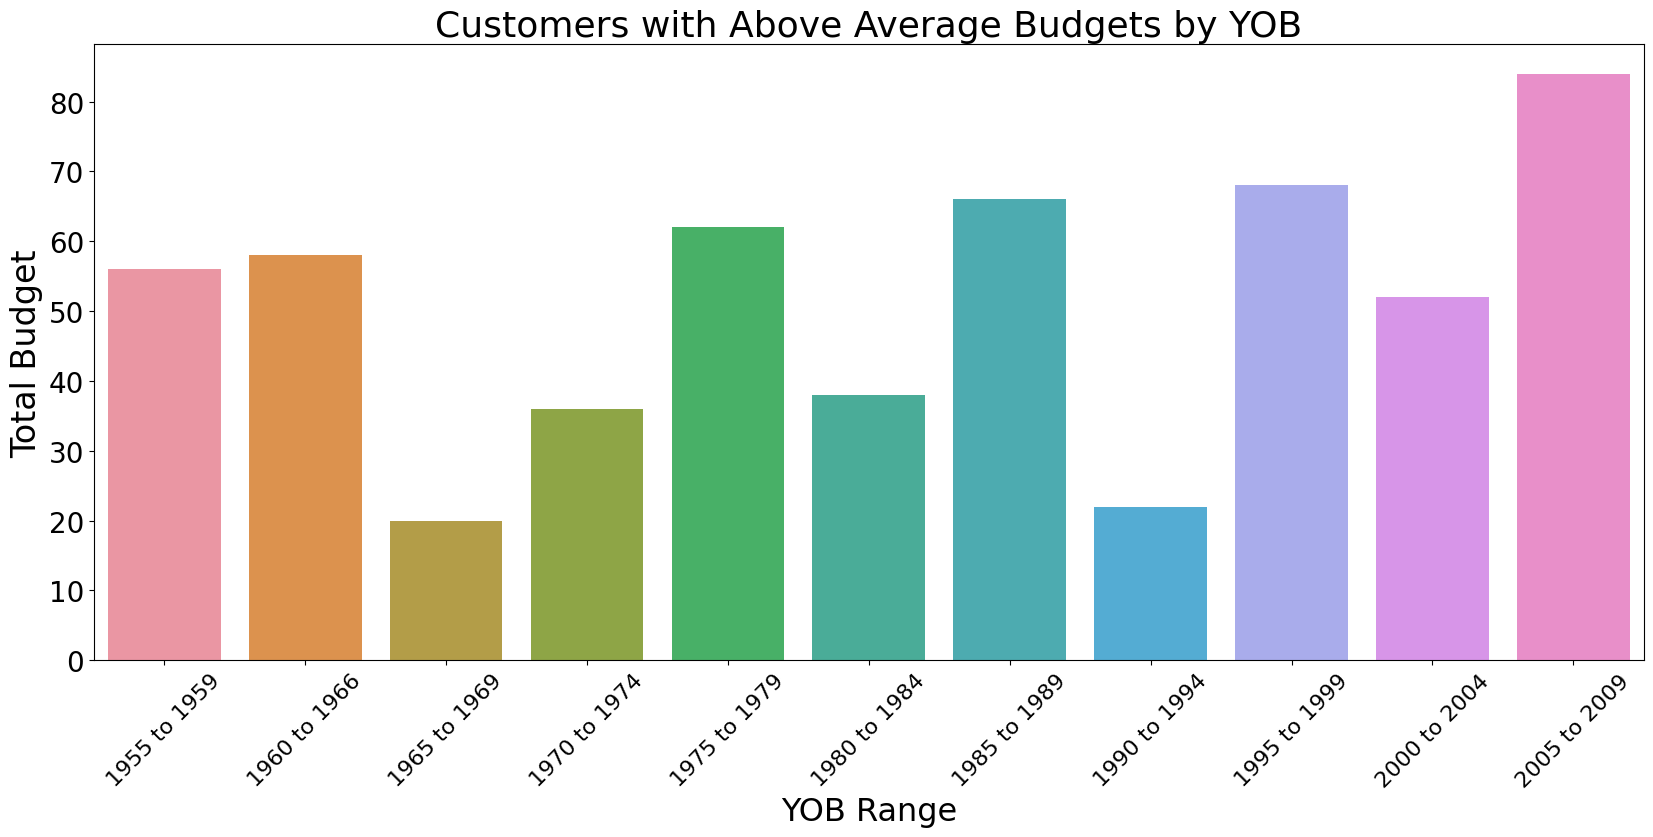

In [24]:
df1 = df[df['Budget'] > df['Budget'].mean()][['Budget', 'YOB']]
years = []
for year in df1['YOB']:
    if year >= 1955 and year < 1960:
        years.append('1955 to 1959')
    elif year >= 1960 and year < 1965:
        years.append('1960 to 1966')
    elif year >= 1965 and year < 1970:
        years.append('1965 to 1969')
    elif year >= 1970 and year < 1975:
        years.append('1970 to 1974')
    elif year >= 1975 and year < 1980:
        years.append('1975 to 1979')
    elif year >= 1980 and year < 1985:
        years.append('1980 to 1984')
    elif year >= 1985 and year < 1990:
        years.append('1985 to 1989')
    elif year >= 1990 and year < 1995:
        years.append('1990 to 1994')
    elif year >= 1995 and year < 2000:
        years.append('1995 to 1999')
    elif year >= 2000 and year < 2005:
        years.append('2000 to 2004')
    elif year >= 2005 and year < 2010:
        years.append('2005 to 2009')
        
df1['Years'] = years

df1 = df1.groupby(years)['Budget'].sum()

plt.figure(figsize=(20, 8))
sns.barplot(x=df1.index, y=df1.values)

plt.xlabel('YOB Range', fontsize=23)
plt.xticks(fontsize=16, rotation=45)
plt.ylabel('Total Budget', fontsize=24)
plt.yticks(fontsize=20)
plt.title('Customers with Above Average Budgets by YOB', fontsize=26);

## Customers born between 2005 to 2009 (the youngest) spent the most eating at the restaurant, followed by those born between 1995-1999 and between 1985-1989. Those born between 1965-1969 and 1990-1994 had the lowest budgets above the average.

Text(0.5, 1.0, 'Customers Who Rated Higher than Average by YOB and Total Budgets')

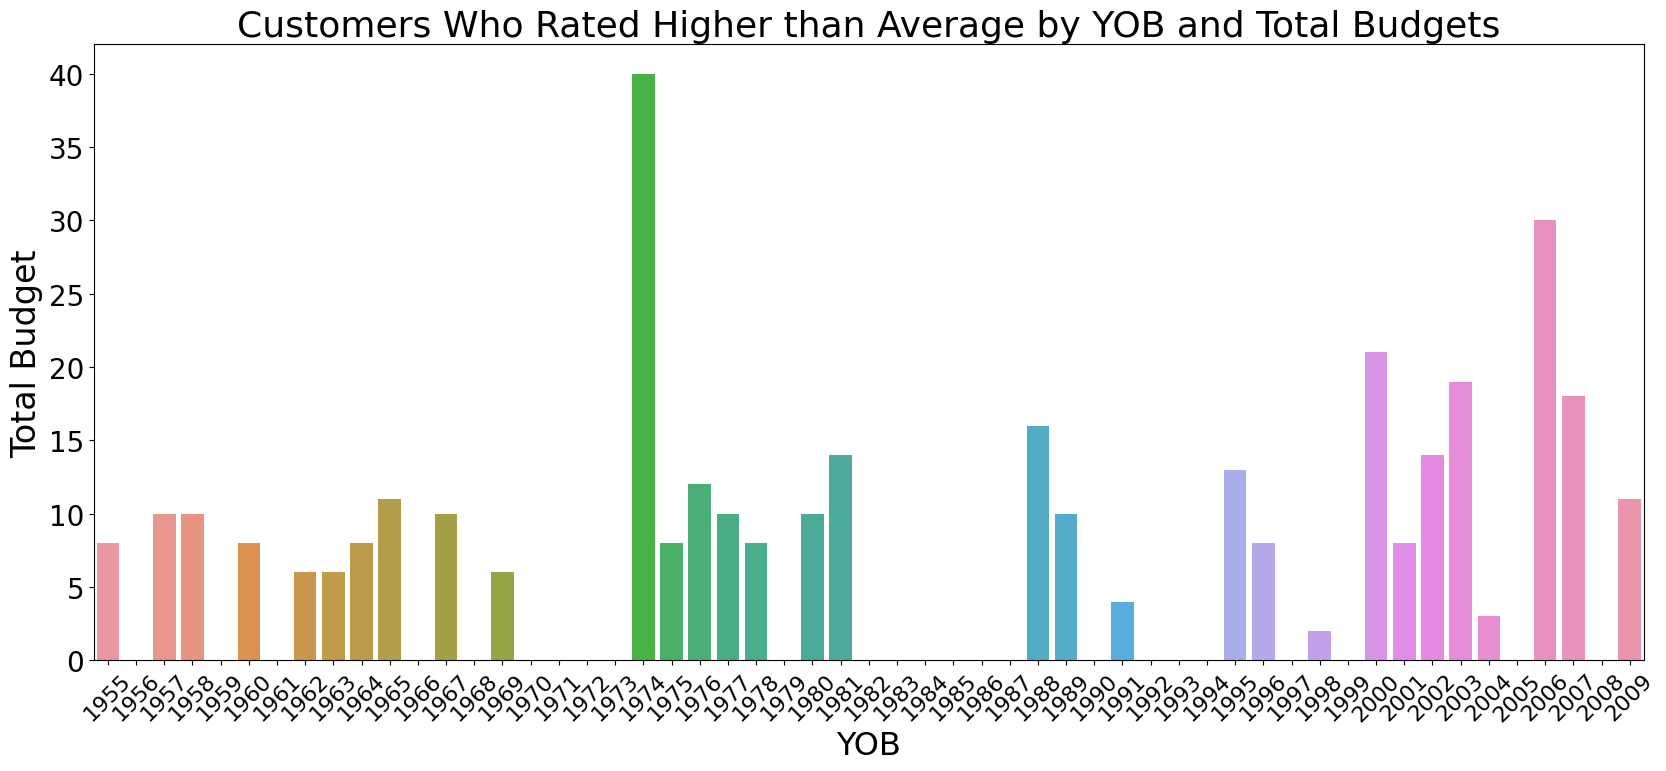

In [25]:
average = df['Overall Rating'].mean()

x = list(range(df['YOB'].min(), df['YOB'].max() + 1))
y = []
z = []

for i in x:
    
    data = df[(df['Overall Rating'] > average) & (df['YOB'] == i)][['Budget']]
    
    if not data.empty:
        
        value = data['Budget'].sum()
        y.append(value)
        
    else:
        y.append(0)

plt.figure(figsize=(20, 8))
sns.barplot(x=x, y=y)

plt.xlabel('YOB', fontsize=23)
plt.xticks(fontsize=16, rotation=45)
plt.ylabel('Total Budget', fontsize=24)
plt.yticks(fontsize=20)
plt.title('Customers Who Rated Higher than Average by YOB and Total Budgets', fontsize=26)

# Customers born in 1974 (about 50 years old) had the highest budgets, as well as those born in 2006 (teenagers). Thos born in 1998 (early 20s) spent the least at the restaurant.

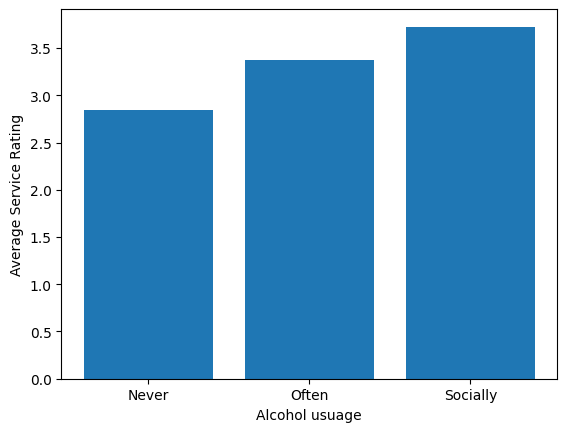

In [26]:
svce_rating_avg = []

for i in df['Alcohol '].unique():
    
    average = df[df['Alcohol '] == i]['Service Rating'].mean()
    svce_rating_avg.append(average)
    
plt.bar(df['Alcohol '].unique(), svce_rating_avg)
plt.xlabel('Alcohol usuage')
plt.ylabel('Average Service Rating');

# Customers who never drink rated meals the lowest, and those who do (only socially) tended to give the highest ratings!

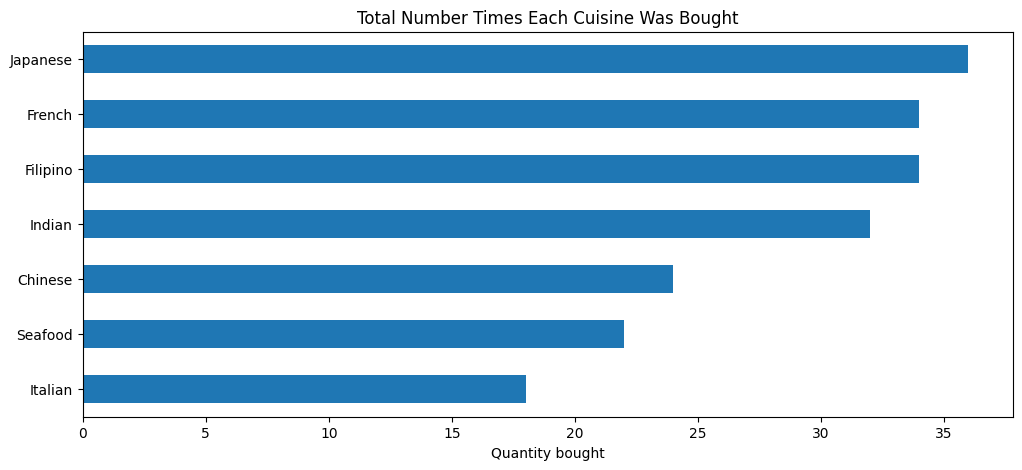

In [27]:
df['Cuisines'].value_counts().sort_values().plot.barh(figsize = (12,5), xlabel = 'Quantity bought', title = 'Total Number Times Each Cuisine Was Bought');

# Again, Japanese food is the star cuisine in this restaurant, and Italian is the least favorite.

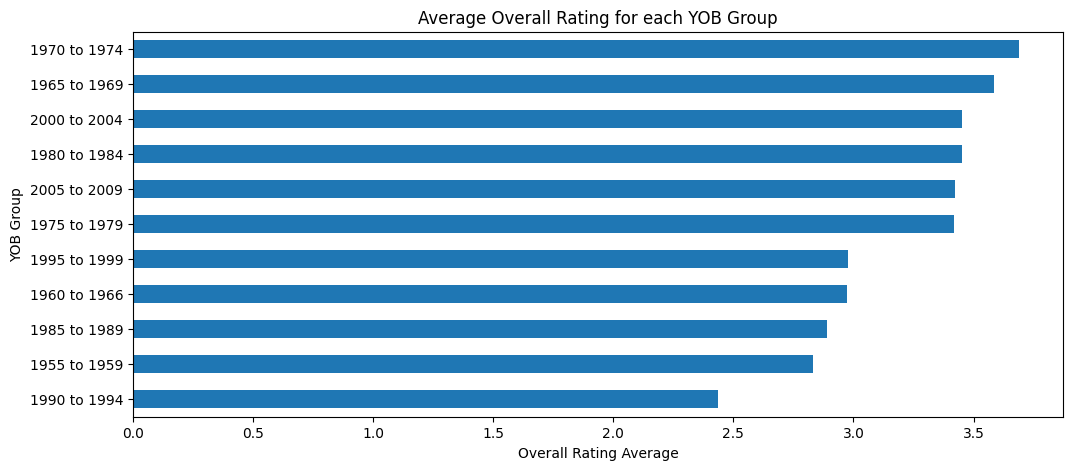

In [28]:
years = []

for year in df['YOB']:
    
    if year >= 1955 and year < 1960:
        years.append('1955 to 1959')
    elif year >= 1960 and year < 1965:
        years.append('1960 to 1966')
    elif year >= 1965 and year < 1970:
        years.append('1965 to 1969')
    elif year >= 1970 and year < 1975:
        years.append('1970 to 1974')
    elif year >= 1975 and year < 1980:
        years.append('1975 to 1979')
    elif year >= 1980 and year < 1985:
        years.append('1980 to 1984')
    elif year >= 1985 and year < 1990:
        years.append('1985 to 1989')
    elif year >= 1990 and year < 1995:
        years.append('1990 to 1994')
    elif year >= 1995 and year < 2000:
        years.append('1995 to 1999')
    elif year >= 2000 and year < 2005:
        years.append('2000 to 2004')
    elif year >= 2005 and year < 2010:
        years.append('2005 to 2009')
        
df2 = pd.DataFrame(years, columns=['Years'])

df2['Overall Rating'] = df['Overall Rating']

df2.groupby(years)['Overall Rating'].mean().sort_values().plot.barh(figsize = (12,5))

plt.xlabel('Overall Rating Average')
plt.ylabel('YOB Group')
plt.title('Average Overall Rating for each YOB Group');